In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
# !pip install openpyxl

In [3]:
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

In [4]:
warnings.filterwarnings('ignore')

## 넷플릭스 

### 1. 데이터 로드

In [5]:
df = pd.read_excel("../EDA/data/netflix_user_data_unclean.xlsx")
df

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn status,Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,C000001,12,10,4.85,4,Tablet,Action,Europe,On-Time,Basic,Yes,10,33.0,6250,5,2,NaN,NaN,NaN
1,C000002,12,8,1.75,9,Laptop,Thriller,Europe,On-Time,Basic,Yes,9,28.0,7018,1,5,NaN,NaN,NaN
2,C000003,3,4,2.75,9,Smart TV,Comedy,Asia,On-Time,Premium,Yes,3,18.0,1055,1,5,NaN,NaN,NaN
3,C000004,3,7,3,9,Smart TV,Drama,Europe,Delayed,Premium,Yes,5,32.0,6707,5,4,NaN,NaN,NaN
4,C000005,24,2,1.37,5,Mobile,Drama,North America,On-Time,Standard,Yes,2,59.0,1506,3,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119774,C062763,1,3,3.52,7,Laptop,Documentary,Asia,Delayed,Basic,Yes,5,47.0,4022,0,1,NaN,NaN,NaN
119775,C008969,6,6,3.54,1,Laptop,Documentary,Europe,On-Time,Basic,Yes,9,45.0,4216,5,5,NaN,NaN,NaN
119776,C106294,24,2,0.52,10,Desktop,Drama,North America,Delayed,Premium,Yes,3,54.0,8145,0,1,NaN,NaN,NaN
119777,C038767,12,1,3.68,1,Laptop,Action,Asia,Delayed,Basic,Yes,8,28.0,3664,3,2,NaN,NaN,NaN


### 2.데이터 구조 및 기초 통계 확인

In [6]:
cols = {
    "Customer ID": "고객번호",
    "Subscription Length (Months)": "구독기간_개월",
    "Customer Satisfaction Score (1-10)": "고객만족도_1_10",
    "Daily Watch Time (Hours)": "일일시청시간_시간",
    "Engagement Rate (1-10)": "참여도_1_10",
    "Device Used Most Often": "주이용기기",
    "Genre Preference": "선호장르",
    "Region": "지역",
    "Payment History (On-Time/Delayed)": "결제이력_정시_지연",
    "Subscription Plan": "구독플랜",
    "Churn status": "이탈여부",
    "Support Queries Logged": "지원문의_건수",
    "Age": "나이",
    "Monthly Income ($)": "월소득_달러",
    "Promotional Offers Used": "프로모션_사용",
    "Number of Profiles Created": "생성프로필수",
    "Unnamed: 16": "미지정_16",
    "Unnamed: 17": "미지정_17",
    "Unnamed: 18": "미지정_18",
}

df = df.rename(columns=cols)
df.head()

,고객번호,구독기간_개월,고객만족도_1_10,일일시청시간_시간,참여도_1_10,주이용기기,선호장르,지역,결제이력_정시_지연,구독플랜,이탈여부,지원문의_건수,나이,월소득_달러,프로모션_사용,생성프로필수,미지정_16,미지정_17,미지정_18
0,C000001,12,10,4.85,4,Tablet,Action,Europe,On-Time,Basic,Yes,10,33.0,6250,5,2,NaN,NaN,NaN
1,C000002,12,8,1.75,9,Laptop,Thriller,Europe,On-Time,Basic,Yes,9,28.0,7018,1,5,NaN,NaN,NaN
2,C000003,3,4,2.75,9,Smart TV,Comedy,Asia,On-Time,Premium,Yes,3,18.0,1055,1,5,NaN,NaN,NaN
3,C000004,3,7,3,9,Smart TV,Drama,Europe,Delayed,Premium,Yes,5,32.0,6707,5,4,NaN,NaN,NaN
4,C000005,24,2,1.37,5,Mobile,Drama,North America,On-Time,Standard,Yes,2,59.0,1506,3,5,NaN,NaN,NaN


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119779 entries, 0 to 119778
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   고객번호        119378 non-null  object 
 1   구독기간_개월     119379 non-null  object 
 2   고객만족도_1_10  119369 non-null  object 
 3   일일시청시간_시간   119352 non-null  object 
 4   참여도_1_10    119354 non-null  object 
 5   주이용기기       119332 non-null  object 
 6   선호장르        119342 non-null  object 
 7   지역          119380 non-null  object 
 8   결제이력_정시_지연  119330 non-null  object 
 9   구독플랜        119383 non-null  object 
 10  이탈여부        119391 non-null  object 
 11  지원문의_건수     119349 non-null  object 
 12  나이          118542 non-null  float64
 13  월소득_달러      119360 non-null  object 
 14  프로모션_사용     119336 non-null  object 
 15  생성프로필수      119381 non-null  object 
 16  미지정_16      0 non-null       float64
 17  미지정_17      2 non-null       float64
 18  미지정_18      1 non-null       float64
dtypes:

,나이,미지정_16,미지정_17,미지정_18
count,118542.000000,0.0,2.000000,1.0
mean,43.823716,NaN,21954.000000,4010.0
std,15.317243,NaN,2835.498193,NaN
min,18.000000,NaN,19949.000000,4010.0
25%,30.000000,NaN,20951.500000,4010.0
50%,44.000000,NaN,21954.000000,4010.0
75%,57.000000,NaN,22956.500000,4010.0
max,70.000000,NaN,23959.000000,4010.0


### 3. 결측치 및 이상치 탐색

In [8]:
unnamed_cols = ["미지정_17", "미지정_18"]
df[df[unnamed_cols].notnull().any(axis=1)]

,고객번호,구독기간_개월,고객만족도_1_10,일일시청시간_시간,참여도_1_10,주이용기기,선호장르,지역,결제이력_정시_지연,구독플랜,이탈여부,지원문의_건수,나이,월소득_달러,프로모션_사용,생성프로필수,미지정_16,미지정_17,미지정_18
3694,C003695,6,3,2.92,6,Laptop,Comedy,Europe,Delayed,Basic,Yes,0,54.0,2905,1,2,NaN,23959.0,4010.0
3700,C003701,24,2,2.61,10,Laptop,Comedy,North America,On-Time,Basic,Yes,7,19.0,1683,3,1,NaN,19949.0,NaN


In [9]:
# 수치형 변수
num_cols = ['구독기간_개월', '고객만족도_1_10', '일일시청시간_시간', '참여도_1_10',
             '지원문의_건수', '월소득_달러', '프로모션_사용', '생성프로필수']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119779 entries, 0 to 119778
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   고객번호        119378 non-null  object 
 1   구독기간_개월     118819 non-null  float64
 2   고객만족도_1_10  119322 non-null  float64
 3   일일시청시간_시간   118473 non-null  float64
 4   참여도_1_10    119317 non-null  float64
 5   주이용기기       119332 non-null  object 
 6   선호장르        119342 non-null  object 
 7   지역          119380 non-null  object 
 8   결제이력_정시_지연  119330 non-null  object 
 9   구독플랜        119383 non-null  object 
 10  이탈여부        119391 non-null  object 
 11  지원문의_건수     118877 non-null  float64
 12  나이          118542 non-null  float64
 13  월소득_달러      118594 non-null  float64
 14  프로모션_사용     118957 non-null  float64
 15  생성프로필수      118975 non-null  float64
 16  미지정_16      0 non-null       float64
 17  미지정_17      2 non-null       float64
 18  미지정_18      1 non-null       float64
dtypes:

,구독기간_개월,고객만족도_1_10,일일시청시간_시간,참여도_1_10,지원문의_건수,나이,월소득_달러,프로모션_사용,생성프로필수,미지정_16,미지정_17,미지정_18
count,118819.000000,119322.000000,118473.000000,119317.000000,118877.000000,118542.000000,118594.000000,118957.000000,118975.000000,0.0,2.000000,1.0
mean,9.169249,5.407771,2.829663,5.485103,4.948400,43.823716,5251.631364,2.422758,2.937785,NaN,21954.000000,4010.0
std,8.213004,2.901673,1.302289,2.898160,3.108673,15.317243,2719.760243,1.688675,1.429728,NaN,2835.498193,NaN
min,1.000000,1.000000,0.500000,-2.000000,0.000000,18.000000,510.000000,0.000000,1.000000,NaN,19949.000000,4010.0
25%,3.000000,3.000000,1.650000,3.000000,2.000000,30.000000,3071.000000,1.000000,2.000000,NaN,20951.500000,4010.0
50%,6.000000,5.000000,2.890000,6.000000,5.000000,44.000000,5272.000000,2.000000,3.000000,NaN,21954.000000,4010.0
75%,12.000000,8.000000,3.940000,8.000000,8.000000,57.000000,7596.000000,4.000000,4.000000,NaN,22956.500000,4010.0
max,24.000000,15.000000,5.000000,10.000000,10.000000,70.000000,9994.000000,5.000000,5.000000,NaN,23959.000000,4010.0


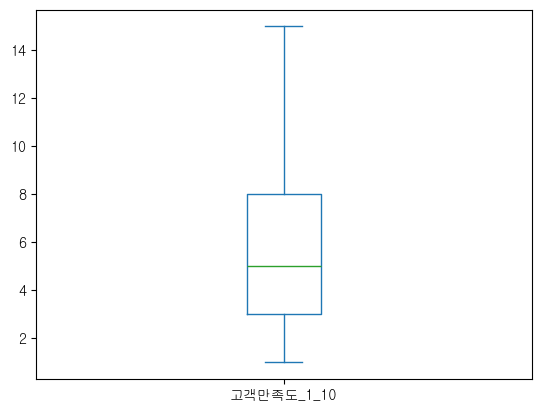

,고객번호,구독기간_개월,고객만족도_1_10,일일시청시간_시간,참여도_1_10,주이용기기,선호장르,지역,결제이력_정시_지연,구독플랜,이탈여부,지원문의_건수,나이,월소득_달러,프로모션_사용,생성프로필수,미지정_16,미지정_17,미지정_18
77,NaN,NaN,15.0,3.01,5.0,Laptop,Thriller,North America,Delayed,Basic,Yes,9.0,38.0,8645.0,3.0,3.0,NaN,NaN,NaN
580,C000581,1.0,15.0,1.89,6.0,Smart TV,NaN,South America,On-Time,Standard,Yes,7.0,44.0,1208.0,1.0,1.0,NaN,NaN,NaN
996,C000997,1.0,15.0,2.66,2.0,Smart_Television,Romance,South America,Delayed,NaN,No,3.0,54.0,588.0,4.0,1.0,NaN,NaN,NaN
1728,C001729,6.0,15.0,3.94,4.0,Desktop,Sci-Fi,Europe,On-Time,Standard,Yes,6.0,57.0,1765.0,1.0,2.0,NaN,NaN,NaN
1775,C001x76,1.0,15.0,2.30,6.0,Desktop,Drama,Europe,Delayed,Basic,Yes,9.0,21.0,5311.0,0.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118578,C043589,12.0,15.0,2.86,2.0,Laptop,Thriller,Asia,On-Time,Standard,Yes,8.0,45.0,9989.0,NaN,5.0,NaN,NaN,NaN
118907,C033505,12.0,15.0,0.99,10.0,Smart TV,Comedy,North America,Late,Standard,Yes,0.0,42.0,4671.0,2.0,4.0,NaN,NaN,NaN
118921,C106703,3.0,15.0,3.14,10.0,Mobile,Thriller,South America,On-Time,Standard,No,3.0,63.0,7700.0,0.0,1.0,NaN,NaN,NaN
119095,C092466,6.0,15.0,1.69,6.0,Mobile,Thriller,Europe,On-Time,Standard,Yes,6.0,43.0,NaN,3.0,5.0,NaN,NaN,NaN


In [10]:
df.isnull().sum()
df['고객만족도_1_10'].plot(kind='box')
plt.show()

df[df['고객만족도_1_10'] > 10]

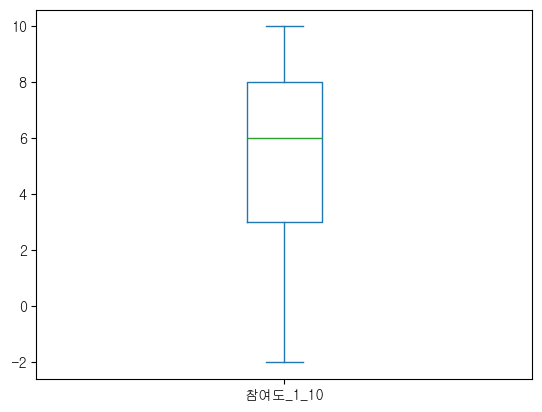

,고객번호,구독기간_개월,고객만족도_1_10,일일시청시간_시간,참여도_1_10,주이용기기,선호장르,지역,결제이력_정시_지연,구독플랜,이탈여부,지원문의_건수,나이,월소득_달러,프로모션_사용,생성프로필수,미지정_16,미지정_17,미지정_18
446,C000447,1.0,5.0,4.12,-2.0,Smart TV,Sci-Fi,Europe,Delayed,Standrd,Yes,1.0,25.0,5730.0,2.0,3.0,NaN,NaN,NaN
1251,C001252,12.0,3.0,0.51,-2.0,Tablet,NaN,Europe,Delayed,Standard,Yes,8.0,62.0,2036.0,5.0,5.0,NaN,NaN,NaN
1444,C001445,6.0,9.0,1.11,-2.0,Desktop,Szi-Fi,Axia,On-Time,Standard,Yes,1.0,42.0,1925.0,5.0,3.0,NaN,NaN,NaN
1804,C001805,12.0,1.0,4.14,-2.0,Laptop,Dramedy,North America,Delayed,Standard,Yes,2.0,19.0,7479.0,3.0,3.0,NaN,NaN,NaN
2012,C002013,3.0,3.0,1.17,-2.0,Laptop,Romance,Asia,Delayed,Premium,No,8.0,70.0,4582.0,0.0,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117602,C117608,6.0,2.0,2.73,-2.0,Laptop,Thriller,South America,Delayed,Standarx,Yes,3.0,18.0,NaN,5.0,4.0,NaN,NaN,NaN
117771,C117777,1.0,5.0,1.98,-2.0,Smart_Television,Romance,North America,Delayed,Premium,Yes,3.0,51.0,6143.0,5.0,4.0,NaN,NaN,NaN
118591,C025818,1.0,3.0,3.67,-2.0,Mobile,Documentary,South America,Delayed,Standard,Yes,7.0,NaN,3441.0,4.0,NaN,NaN,NaN,NaN
118723,###,3.0,NaN,2.71,-2.0,Desktop,Action,Africa,On-Time,Standard,Yes,5.0,52.0,3665.0,2.0,1.0,NaN,NaN,NaN


In [11]:
df.isnull().sum()
df['참여도_1_10'].plot(kind='box')
plt.show()

df[df['참여도_1_10'] < 1]

In [12]:
# 범주형 변수
cat_cols = ['주이용기기', '선호장르', '지역', '결제이력_정시_지연', '구독플랜', '이탈여부']
for col in cat_cols:
    print(df[col].value_counts())

주이용기기
Laptop      26652
Mobile      23785
Tablet      23691
Smart TV    22406
Desktop     21968
            ...  
SmartyTV        1
Smyrt TV        1
Deskzop         1
Deskyop         1
Mobilz          1
Name: count, Length: 103, dtype: int64
선호장르
Sci-Fi         19801
Romance        17100
Drama          17072
Thriller       16633
Documentary    16457
               ...  
Dycumentary        1
xomance            1
yction             1
Documentazy        1
Docxmentary        1
Name: count, Length: 147, dtype: int64
지역
Asia             24282
Africa           24063
Europe           23831
South America    23807
North America    22544
                 ...  
Souxh America        1
Norty America        1
North Americx        1
North xmerica        1
South Ameyica        1
Name: count, Length: 116, dtype: int64
결제이력_정시_지연
Delayed    60675
On-Time    57842
Late         405
On-Tiye       20
Delazed       17
On-Tyme       17
Delayex       16
zn-Time       15
On-Timx       13
Delayez       13
Ox-Tim

In [13]:
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip()

df.loc[df['주이용기기'].str.contains('smar|tv', case=False, na=False), '주이용기기'] = 'Smart TV'
df.loc[df['주이용기기'].str.contains('la|laz|lay|ptop', case=False, na=False), '주이용기기'] = 'Laptop'
df.loc[df['주이용기기'].str.contains('tab|let|txble|tazl|tzbl|xabl|tybl|taxl', case=False, na=False), '주이용기기'] = 'Tablet'
df.loc[df['주이용기기'].str.contains('mo|bile|mzb|myb|yob', case=False, na=False), '주이용기기'] = 'Mobile'
df.loc[df['주이용기기'].str.contains('des|ktop', case=False, na=False), '주이용기기'] = 'Desktop'

df.loc[df['선호장르'].str.contains('docu|docx|ntary', case=False, na=False), '선호장르'] = 'Documentary'
df.loc[df['선호장르'].str.contains('rom|ance', case=False, na=False), '선호장르'] = 'Romance'
df.loc[df['선호장르'].str.contains('act|.ction|a.tion|ac.ion', case=False, na=False), '선호장르'] = 'Action'
df.loc[df['선호장르'].str.contains('dra|rama|dr.ma|d.ama', case=False, na=False), '선호장르'] = 'Drama'
df.loc[df['선호장르'].str.contains('th|riller', case=False, na=False), '선호장르'] = 'Thriller'
df.loc[df['선호장르'].str.contains('sc.*i|.ci.fi|s.i.fi', case=False, na=False), '선호장르'] = 'Sci-Fi'
df.loc[df['선호장르'].str.contains('co|medy', case=False, na=False), '선호장르'] = 'Comedy'

df.loc[df['지역'].str.contains('or.h.*meric.|no.* am.*|north a.erica|n.*america', case=False, na=False), '지역'] = 'North America'
df.loc[df['지역'].str.contains('ou.h.*meric.|so.* am.*|south a.erica|s.*america', case=False, na=False), '지역'] = 'South America'
df.loc[df['지역'].str.contains('eu.*pe|.urop.|euro.e|e.rope', case=False, na=False), '지역'] = 'Europe'
df.loc[df['지역'].str.contains('asi.|as.a|a.ia|.sia', case=False, na=False), '지역'] = 'Asia'
df.loc[df['지역'].str.contains('a.rica|af.ica|afr.*|.frica', case=False, na=False), '지역'] = 'Africa'

df.loc[df['결제이력_정시_지연'].str.contains('on|ime', case=False, na=False), '결제이력_정시_지연'] = 'On-Time'
df.loc[df['결제이력_정시_지연'].str.contains('de|yed|zed', case=False, na=False), '결제이력_정시_지연'] = 'Delayed'
df.loc[df['결제이력_정시_지연'].str.contains('ate', case=False, na=False), '결제이력_정시_지연'] = 'Late'

df.loc[df['구독플랜'].str.contains('ba|sic', case=False, na=False), '구독플랜'] = 'Basic'
df.loc[df['구독플랜'].str.contains('stan|dard|drd', case=False, na=False), '구독플랜'] = 'Standard'
df.loc[df['구독플랜'].str.contains('pre|mium', case=False, na=False), '구독플랜'] = 'Premium'

df.loc[df['이탈여부'].str.contains('ye|yy|yx|yz|es', case=False, na=False), '이탈여부'] = 'Yes'
df.loc[df['이탈여부'].str.contains('no|nx|ny|nz|xo|yo|zo', case=False, na=False), '이탈여부'] = 'No'
df.loc[df['이탈여부'].str.contains('may', case=False, na=False), '이탈여부'] = 'Maybe'

for col in cat_cols:
    print(df[col].value_counts())

주이용기기
Laptop      26752
Mobile      23872
Tablet      23792
Smart TV    22890
Desktop     22026
nan           447
Name: count, dtype: int64
선호장르
Sci-Fi         19860
Drama          17514
Romance        17148
Thriller       16693
Documentary    16517
Action         16159
Comedy         15451
nan              437
Name: count, dtype: int64
지역
Asia             24790
Africa           24162
Europe           23916
South America    23894
North America    22618
nan                399
Name: count, dtype: int64
결제이력_정시_지연
Delayed    60870
On-Time    58055
nan          449
Late         405
Name: count, dtype: int64
구독플랜
Standard    42316
Premium     39131
Basic       37936
nan           396
Name: count, dtype: int64
이탈여부
Yes      106381
No        12587
Maybe       423
nan         388
Name: count, dtype: int64


### 4. 데이터 시각화를 통한 탐색

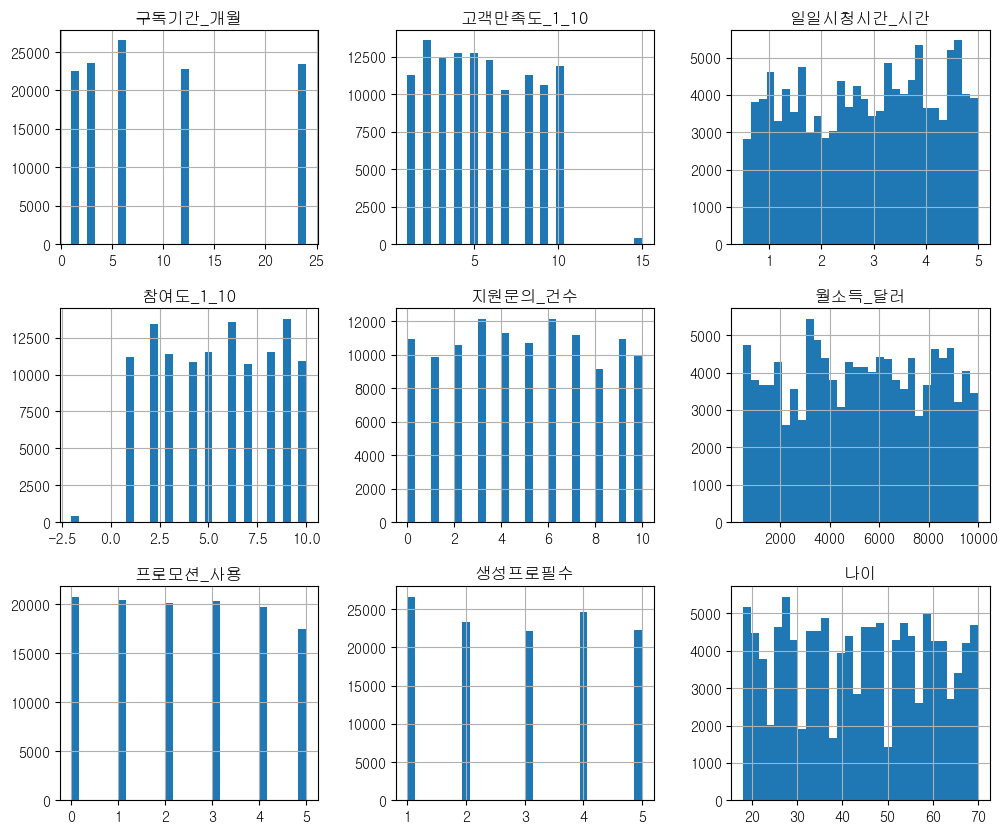

In [14]:
num_cols = ['구독기간_개월', '고객만족도_1_10', '일일시청시간_시간', '참여도_1_10',
             '지원문의_건수', '월소득_달러', '프로모션_사용', '생성프로필수', '나이']

df[num_cols].hist(figsize=(12,10), bins=30)
plt.show()

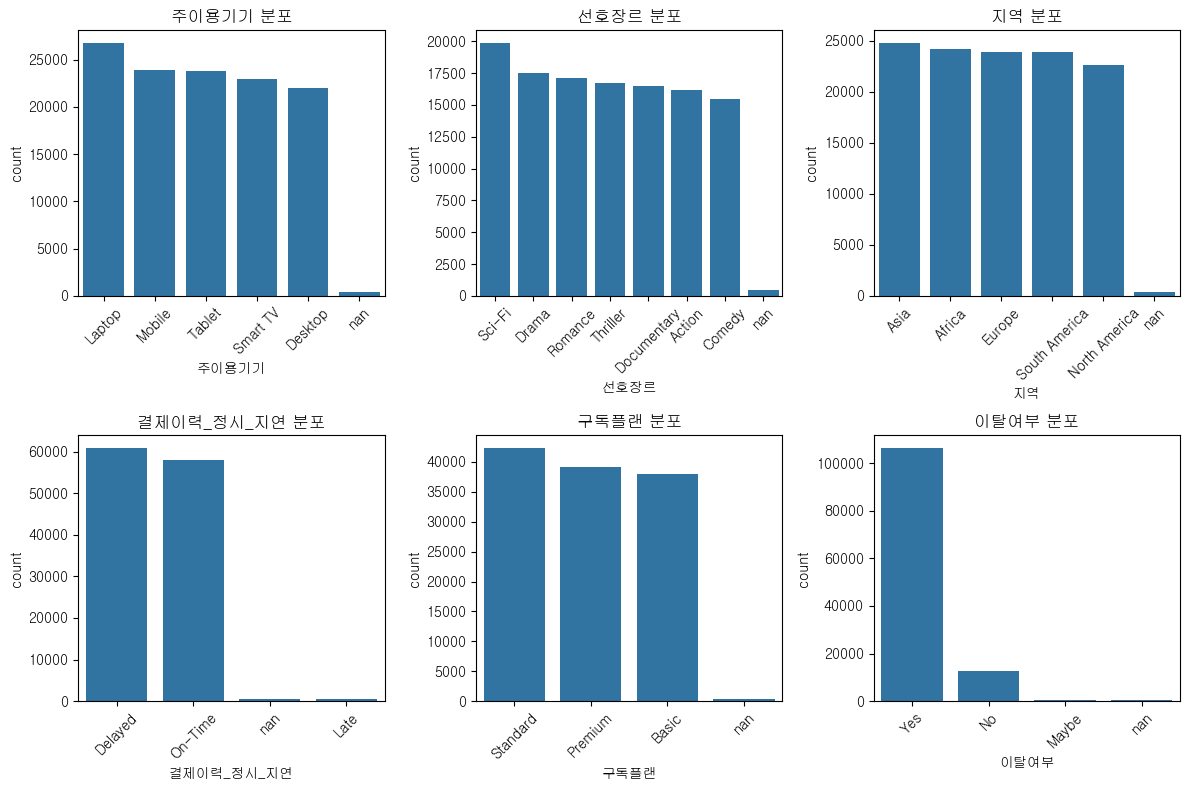

In [15]:
fig, ax = plt.subplots(figsize=(12,8), ncols=3, nrows=2)
ax = ax.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=ax[i])
    ax[i].set_title(f"{col} 분포")
    ax[i].set_xticklabels(df[col].value_counts().index, rotation=45)
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 5. 데이터 정제 및 전처리

In [16]:
# 불필요한 컬럼 제거
cols = ['고객번호', '미지정_16', '미지정_17', '미지정_18']
cleaned_df = df.drop(columns=cols)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119779 entries, 0 to 119778
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   구독기간_개월     118819 non-null  float64
 1   고객만족도_1_10  119322 non-null  float64
 2   일일시청시간_시간   118473 non-null  float64
 3   참여도_1_10    119317 non-null  float64
 4   주이용기기       119779 non-null  object 
 5   선호장르        119779 non-null  object 
 6   지역          119779 non-null  object 
 7   결제이력_정시_지연  119779 non-null  object 
 8   구독플랜        119779 non-null  object 
 9   이탈여부        119779 non-null  object 
 10  지원문의_건수     118877 non-null  float64
 11  나이          118542 non-null  float64
 12  월소득_달러      118594 non-null  float64
 13  프로모션_사용     118957 non-null  float64
 14  생성프로필수      118975 non-null  float64
dtypes: float64(9), object(6)
memory usage: 13.7+ MB


In [17]:
# 결측치 처리
cleaned_df.replace('nan', np.nan, inplace=True)
cleaned_df['이탈여부'].replace('Maybe', np.nan, inplace=True)
cleaned_df = cleaned_df.dropna()
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112237 entries, 0 to 119778
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   구독기간_개월     112237 non-null  float64
 1   고객만족도_1_10  112237 non-null  float64
 2   일일시청시간_시간   112237 non-null  float64
 3   참여도_1_10    112237 non-null  float64
 4   주이용기기       112237 non-null  object 
 5   선호장르        112237 non-null  object 
 6   지역          112237 non-null  object 
 7   결제이력_정시_지연  112237 non-null  object 
 8   구독플랜        112237 non-null  object 
 9   이탈여부        112237 non-null  object 
 10  지원문의_건수     112237 non-null  float64
 11  나이          112237 non-null  float64
 12  월소득_달러      112237 non-null  float64
 13  프로모션_사용     112237 non-null  float64
 14  생성프로필수      112237 non-null  float64
dtypes: float64(9), object(6)
memory usage: 13.7+ MB


In [18]:
# 이상치 처리
cleaned_df = cleaned_df[(cleaned_df['고객만족도_1_10'] >= 1) & (cleaned_df['고객만족도_1_10'] <= 10)]
cleaned_df = cleaned_df[cleaned_df['참여도_1_10'] >= 1]

In [19]:
# 연속형 값 단순화
simplified_df = cleaned_df.copy()

simplified_df['일일시청시간_시간'] = simplified_df['일일시청시간_시간'].round().astype(int)
simplified_df['월소득_달러'] = (simplified_df['월소득_달러'] // 1000) * 1000
simplified_df['나이'] = (simplified_df['나이'] // 10) * 10

print(simplified_df['일일시청시간_시간'].unique()) 
print(simplified_df['월소득_달러'].unique()) 
print(simplified_df['나이'].unique())

[5 2 3 1 4 0]
[6000. 7000. 1000. 5000. 2000. 3000. 4000. 9000. 8000.    0.]
[30. 20. 10. 50. 60. 40. 70.]


In [20]:
simplified_df

,구독기간_개월,고객만족도_1_10,일일시청시간_시간,참여도_1_10,주이용기기,선호장르,지역,결제이력_정시_지연,구독플랜,이탈여부,지원문의_건수,나이,월소득_달러,프로모션_사용,생성프로필수
0,12.0,10.0,5,4.0,Tablet,Action,Europe,On-Time,Basic,Yes,10.0,30.0,6000.0,5.0,2.0
1,12.0,8.0,2,9.0,Laptop,Thriller,Europe,On-Time,Basic,Yes,9.0,20.0,7000.0,1.0,5.0
2,3.0,4.0,3,9.0,Smart TV,Comedy,Asia,On-Time,Premium,Yes,3.0,10.0,1000.0,1.0,5.0
3,3.0,7.0,3,9.0,Smart TV,Drama,Europe,Delayed,Premium,Yes,5.0,30.0,6000.0,5.0,4.0
4,24.0,2.0,1,5.0,Mobile,Drama,North America,On-Time,Standard,Yes,2.0,50.0,1000.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119774,1.0,3.0,4,7.0,Laptop,Documentary,Asia,Delayed,Basic,Yes,5.0,40.0,4000.0,0.0,1.0
119775,6.0,6.0,4,1.0,Laptop,Documentary,Europe,On-Time,Basic,Yes,9.0,40.0,4000.0,5.0,5.0
119776,24.0,2.0,1,10.0,Desktop,Drama,North America,Delayed,Premium,Yes,3.0,50.0,8000.0,0.0,1.0
119777,12.0,1.0,4,1.0,Laptop,Action,Asia,Delayed,Basic,Yes,8.0,20.0,3000.0,3.0,2.0


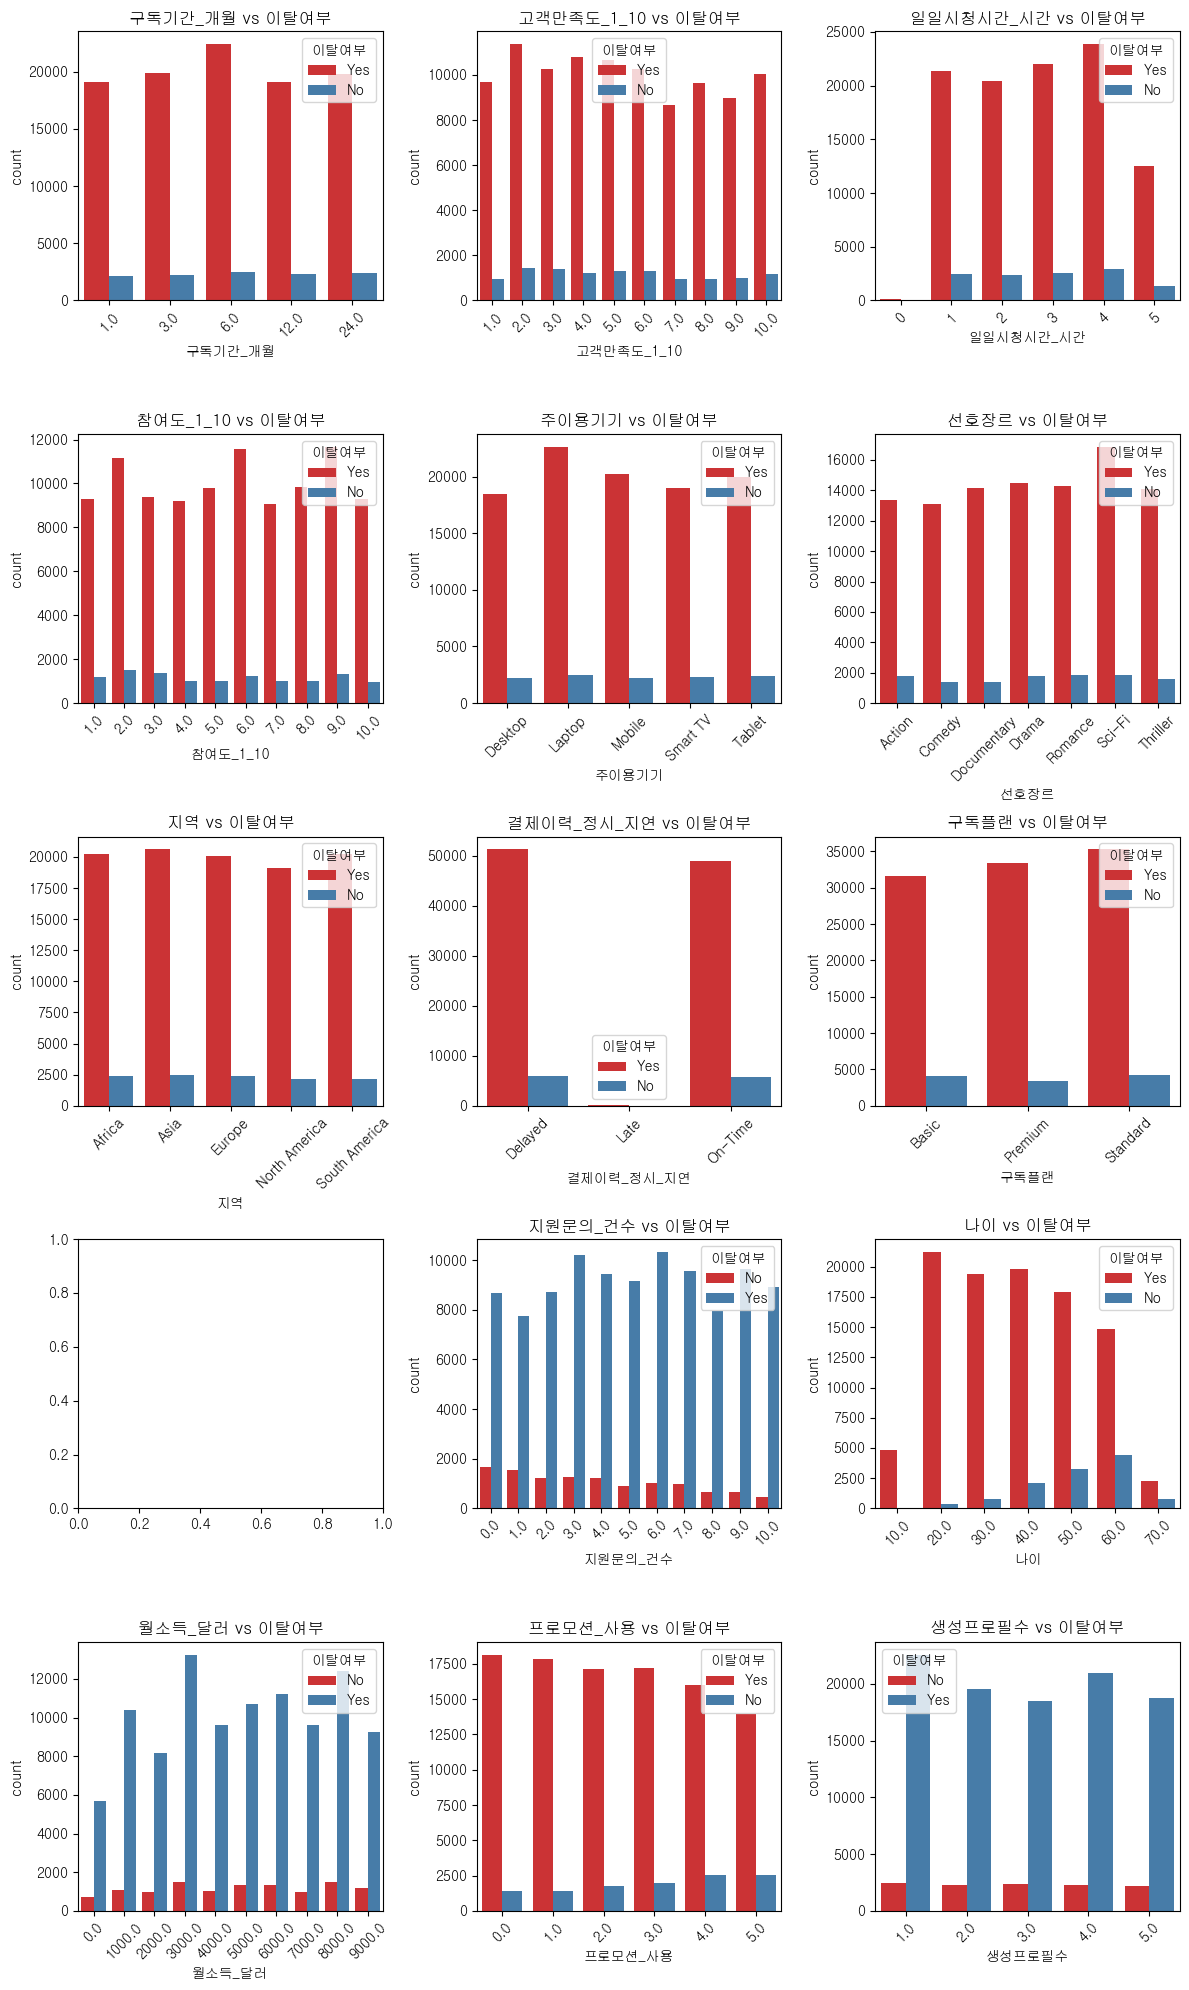

In [21]:
fig, ax = plt.subplots(figsize=(12,20), ncols=3, nrows=5)
ax = ax.flatten()

for i, col in enumerate(simplified_df.columns):
    if col == '이탈여부':
        continue
    sns.countplot(data=simplified_df, x=col, hue='이탈여부', palette="Set1", ax=ax[i], order=sorted(simplified_df[col].unique()) )
    ax[i].set_title(f"{col} vs 이탈여부")
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 6. 데이터 변환 및 피처 엔지니어링

In [22]:
# 수치형 표준화
from sklearn.preprocessing import StandardScaler

encoded_df = simplified_df.copy()

scaler = StandardScaler()
encoded_df[num_cols] = scaler.fit_transform(encoded_df[num_cols])

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoded_df = simplified_df.copy()
for col in cat_cols:
    encoded_df[col] = encoded_df[col].astype(str)
    encoder = LabelEncoder()
    encoded_df[col] = encoder.fit_transform(encoded_df[col])

# encoder = OneHotEncoder(drop='first', sparse_output=False)
# encoded = encoder.fit_transform(simplified_df[cat_cols])
# 
# encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))
# final_df = pd.concat([simplified_df.drop(columns=cat_cols), encoded_df], axis=1)

# encoded_df = pd.get_dummies(encoded_df, columns=cat_cols, drop_first=True)

In [24]:
encoded_df['월평균시청시간'] = encoded_df['일일시청시간_시간'] * 30
encoded_df['충성도지수'] = encoded_df['구독기간_개월'] * encoded_df['고객만족도_1_10']
encoded_df['log_구독기간'] = np.log1p(encoded_df['구독기간_개월'])

encoded_df.drop(['일일시청시간_시간', '구독기간_개월'], axis=1, inplace=True)

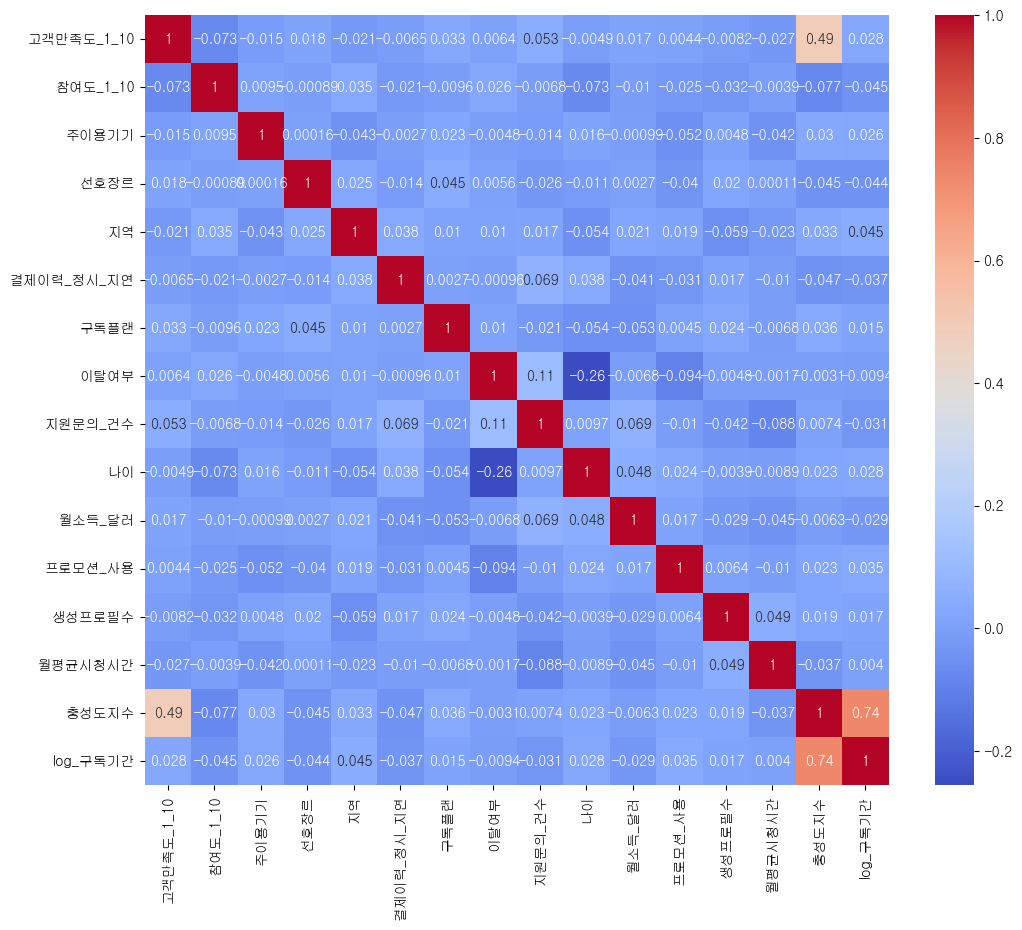

In [25]:
corr_matrix = encoded_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [26]:
encoded_df.to_csv('../EDA/data/netflix_user_data_cleaned.csv',index=False,encoding='utf-8')